In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, Merge, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

%matplotlib inline

Using Theano backend.


In [2]:
rides = pd.read_csv('data/hour.csv')
rides['time'] = pd.to_datetime(rides['dteday'])+pd.Series([pd.DateOffset(hours = a ) for a in rides.hr.tolist()])
rides.drop(['instant','yr','dteday','casual','registered', 'atemp'],1,inplace=True)
rides['t'] = rides.time.values.astype(float)
rides.head()

/opt/conda/lib/python3.5/site-packages/pandas/core/ops.py:539: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


season  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       1     1   0        0        6           0           1  0.24  0.81   
1       1     1   1        0        6           0           1  0.22  0.80   
2       1     1   2        0        6           0           1  0.22  0.80   
3       1     1   3        0        6           0           1  0.24  0.75   
4       1     1   4        0        6           0           1  0.24  0.75   

   windspeed  cnt                time             t  
0        0.0   16 2011-01-01 00:00:00  1.293840e+18  
1        0.0   40 2011-01-01 01:00:00  1.293844e+18  
2        0.0   32 2011-01-01 02:00:00  1.293847e+18  
3        0.0   13 2011-01-01 03:00:00  1.293851e+18  
4        0.0    1 2011-01-01 04:00:00  1.293854e+18

Get **one hot encoded** values of the categorical variables. Note the `drop_first=True` component.

In [3]:
cat_features = ['season', 'hr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
rides = pd.get_dummies(rides, columns=cat_features, drop_first=True) 
rides.head()

temp   hum  windspeed  cnt                time             t  season_2  \
0  0.24  0.81        0.0   16 2011-01-01 00:00:00  1.293840e+18         0   
1  0.22  0.80        0.0   40 2011-01-01 01:00:00  1.293844e+18         0   
2  0.22  0.80        0.0   32 2011-01-01 02:00:00  1.293847e+18         0   
3  0.24  0.75        0.0   13 2011-01-01 03:00:00  1.293851e+18         0   
4  0.24  0.75        0.0    1 2011-01-01 04:00:00  1.293854e+18         0   

   season_3  season_4  hr_1      ...       weekday_1  weekday_2  weekday_3  \
0         0         0     0      ...               0          0          0   
1         0         0     1      ...               0          0          0   
2         0         0     0      ...               0          0          0   
3         0         0     0      ...               0          0          0   
4         0         0     0      ...               0          0          0   

   weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  \
0          0          0          1             0             0             0   
1          0          0          1             0             0             0   
2          0          0          1             0             0             0   
3          0          0          1             0             0             0   
4          0          0          1             0             0             0   

   weathersit_4  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 54 columns]

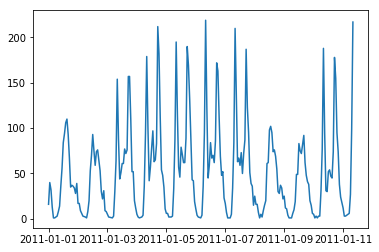

In [4]:
plt.plot(rides.time[:240],rides.cnt[:240])
plt.show()

In [5]:
quant_features = ['temp', 'hum', 'windspeed','t']
x_scaler = StandardScaler()
rides[quant_features] = x_scaler.fit_transform(rides[quant_features].values)

y_scaler = StandardScaler()
rides['cnt'] = y_scaler.fit_transform(rides['cnt'].values[:,None])

rides.head()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


temp       hum  windspeed       cnt                time         t  \
0 -1.334648  0.947372  -1.553889 -0.956339 2011-01-01 00:00:00 -1.745435   
1 -1.438516  0.895539  -1.553889 -0.824022 2011-01-01 01:00:00 -1.745236   
2 -1.438516  0.895539  -1.553889 -0.868128 2011-01-01 02:00:00 -1.745038   
3 -1.334648  0.636370  -1.553889 -0.972879 2011-01-01 03:00:00 -1.744840   
4 -1.334648  0.636370  -1.553889 -1.039037 2011-01-01 04:00:00 -1.744641   

   season_2  season_3  season_4  hr_1      ...       weekday_1  weekday_2  \
0         0         0         0     0      ...               0          0   
1         0         0         0     1      ...               0          0   
2         0         0         0     0      ...               0          0   
3         0         0         0     0      ...               0          0   
4         0         0         0     0      ...               0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  \
0          0          0          0          1             0             0   
1          0          0          0          1             0             0   
2          0          0          0          1             0             0   
3          0          0          0          1             0             0   
4          0          0          0          1             0             0   

   weathersit_3  weathersit_4  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 54 columns]

Split into training and testing data

In [6]:
SVR?

In [7]:
train_data = rides[:-21*24]
test_data = rides[-21*24:]

train_x = train_data.drop(['cnt','time'],axis=1)
test_x = test_data.drop(['cnt','time'],axis=1)

In [40]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# create the sub models
estimators = []
estimators.append(( 'linear' , LinearRegression()))
estimators.append(( 'Random Forest' , RandomForestRegressor()))
estimators.append(( 'SVM' , SVR())) #Suppor Vector Machines

for model_name, model in estimators:
    res = cross_val_score(model, train_x, train_data['cnt'], cv=10, 
                          scoring='neg_mean_squared_error')
    print(model_name+' : '+str(-res.mean())+' ('+str(res.std())+ ')')

linear : 0.342585931399 (0.148649396312)
Random Forest : 0.161910278435 (0.0623367980617)
svm : 0.222756802956 (0.130537808513)


In [8]:
from xgboost import XGBRegressor

res = cross_val_score(XGBRegressor(), train_x, train_data['cnt'], cv=10, 
                          scoring='neg_mean_squared_error')
print('XGBoost : '+str(-res.mean())+' ('+str(res.std())+ ')')

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBoost : 0.230376611932 (0.124462645693)


In [9]:
model = XGBRegressor()
model.fit(train_x, train_data['cnt'])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
pred_y = model.predict(test_x)
error = test_data['cnt'] - pred_y
print(np.mean(np.square(error)))

0.366700817704


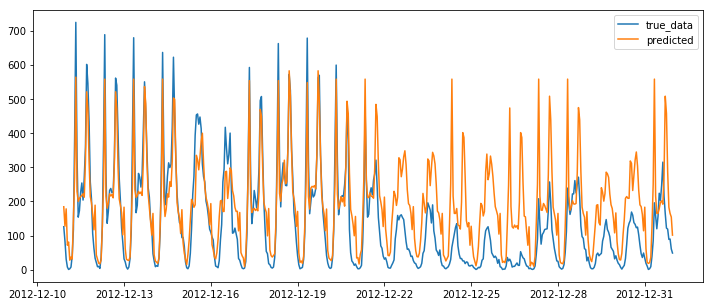

In [11]:
plt.figure(figsize=(12,5))
plt.plot(test_data['time'],y_scaler.inverse_transform(test_data['cnt']), label='true_data')
plt.plot(test_data['time'],y_scaler.inverse_transform(pred_y), label='predicted')
plt.legend()
plt.show()

In [12]:
import xgboost as xgb

xgbTrainData = xgb.DMatrix(train_x.values, train_data.cnt.values, feature_names=train_x.columns.values.tolist())
xgbTestData = xgb.DMatrix(test_x.values, feature_names=train_x.columns.values.tolist())
param = {'max_depth':2, 'objective':'reg:linear', 'eta':0.2}

model = xgb.train(param, xgbTrainData, num_boost_round=30)

In [13]:
pred_y = model.predict(xgbTestData)
error = test_data['cnt'] - pred_y
print(np.mean(np.square(error)))

0.498790857496


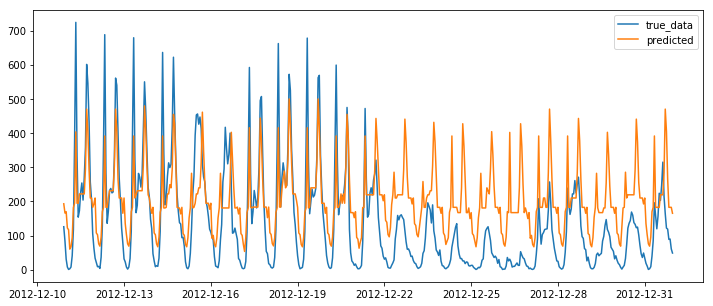

In [14]:
plt.figure(figsize=(12,5))
plt.plot(test_data['time'],y_scaler.inverse_transform(test_data['cnt']), label='true_data')
plt.plot(test_data['time'],y_scaler.inverse_transform(pred_y), label='predicted')
plt.legend()
plt.show()

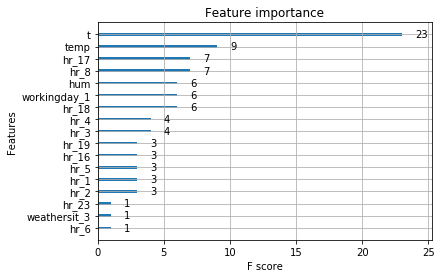

In [15]:
xgb.plot_importance(model)
plt.show()

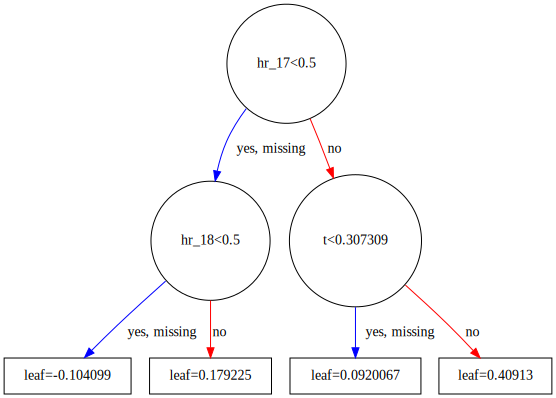

In [16]:
xgb.to_graphviz(model, num_trees=1)

## Best Hyper parameters

Change the number of trees, depth of tree and learning rate to choose best xgboost model.

In [17]:
model = XGBRegressor()

trees = [10,20,30]
depth = [2,3,4]
eta = [1e-2, 1e-1]

param_grid = dict(max_depth=depth, n_estimators=trees, learning_rate = eta)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)

In [18]:
grid_result = grid.fit(train_x, train_data['cnt'])

In [19]:
[grid_result.best_score_, grid_result.best_params_]

[-0.36305377056241572,
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30}]

In [20]:
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

-1.180117 (0.255839) with: {'max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 10}
-1.113671 (0.267421) with: {'max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 20}
-1.056985 (0.279776) with: {'max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 30}
-1.162475 (0.252921) with: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 10}
-1.079815 (0.259127) with: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 20}
-1.005851 (0.266658) with: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 30}
-1.140149 (0.242276) with: {'max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 10}
-1.046260 (0.242711) with: {'max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 20}
-0.962281 (0.244874) with: {'max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 30}
-0.793515 (0.326464) with: {'max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 10}
-0.641093 (0.324635) with: {'max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 20}
-0.554971 (0.303945) with: {'max_depth': 2, '

/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [21]:
pred_y = grid.predict(test_x)
error = test_data['cnt'] - pred_y
np.mean(np.square(error))

0.41480160995311177

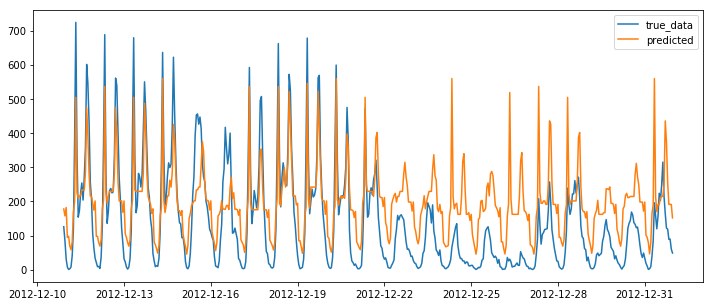

In [22]:
plt.figure(figsize=(12,5))
plt.plot(test_data['time'],y_scaler.inverse_transform(test_data['cnt']), label='true_data')
plt.plot(test_data['time'],y_scaler.inverse_transform(pred_y), label='predicted')
plt.legend()
plt.show()